In [3]:
import os
import requests
from PIL import Image
from langchain_core.messages import HumanMessage, SystemMessage
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from langchain_groq import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from dotenv import load_dotenv
from groq import Groq
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings



# Load environment variables
load_dotenv()

# API Keys
grok_api_key = os.getenv("GROK_API_KEY")
HF_TOKEN = os.getenv("HF_TOKEN")
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

c:\Users\hp\Desktop\kunal_repo\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [136]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

from langchain.vectorstores import DocArrayInMemorySearch


In [137]:
from langchain_text_splitters import CharacterTextSplitter

In [4]:
def load_model(model_name):
  if model_name=="gemini-pro":
    llm = ChatGoogleGenerativeAI(model="gemini-pro")
  else:
    llm=ChatGoogleGenerativeAI(model="gemini-1.5-flash-8b")

  return llm


In [10]:
model_text=load_model("gemini-1.5-pro")


In [11]:
model_text.invoke("please come up with the best funny line.").content


'My favorite kind of people are those who are allergic to spiders.  They have such interesting stories to tell.'

In [141]:
prompt="give me summary of this image in 5 words"


In [142]:
def get_image(url,filename,extension):
  content = requests.get(url).content
  with open(f'content/{filename}.{extension}', 'wb') as f:
    f.write(content)
  image = Image.open(f"content/{filename}.{extension}")
  image.show()
  return image


In [143]:
image = get_image("https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png",
                  "nike-shoes",
                  "png")

In [149]:
image ="https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png"

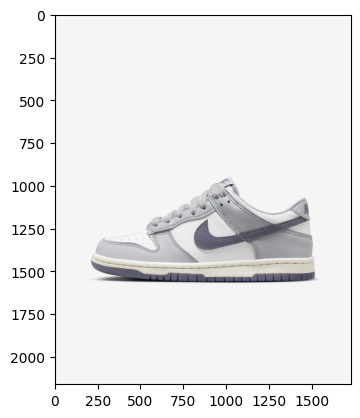

In [144]:
plt.imshow(image)
plt.show()

In [145]:
vision_model=load_model("gemini-1.5-flash-8b")


In [150]:
message= HumanMessage(
    content=[
         {
            "type": "text",
            "text": prompt,
        },
        {

            "type": "image_url", "image_url": image
        }
    ]
)
  

In [151]:
vision_model

ChatGoogleGenerativeAI(model='models/gemini-1.5-flash-8b', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001B7CDB20F50>, default_metadata=())

In [152]:
print(vision_model.invoke([message]).content)

Gray Nike Dunk Low shoe.


In [153]:
loader = TextLoader("content/nike_shoes.txt")
print(loader.load()[0].page_content)

Nike Air Max Plus sneakers. They feature a brown upper with a black Nike Swoosh logo on the side and a visible Air Max unit in the heel. The sole is white.
Here are some more details about the Nike Air Max Plus:
Style: TN
Release date: January 1, 2017
Style code: 852630-300
Original retail price: $150 USD
The Air Max Plus, also known as the TN, is a popular Nike running shoe that was first released in 1998. It is known for its unique design, which includes a gradient upper, visible Air Max units, and a wavy outsole. The TN has been a popular shoe among sneakerheads and casual wearers alike for over two decades.
It features a brown upper with a black Swoosh logo and a white sole. The shoe is currently available for resale on the StockX marketplace for an average price of around $150 USD.
Nike Air Max Plus Store Location: "Kings Way, Kathmandu, Nepal".
\n\n\n



Nike Dunk Low Retro sneakers.
Here are some more details about the Nike Dunk Low Retro:
Style: Low-top
Release date: October 31

In [154]:
text=loader.load()[0].page_content
text


'Nike Air Max Plus sneakers. They feature a brown upper with a black Nike Swoosh logo on the side and a visible Air Max unit in the heel. The sole is white.\nHere are some more details about the Nike Air Max Plus:\nStyle: TN\nRelease date: January 1, 2017\nStyle code: 852630-300\nOriginal retail price: $150 USD\nThe Air Max Plus, also known as the TN, is a popular Nike running shoe that was first released in 1998. It is known for its unique design, which includes a gradient upper, visible Air Max units, and a wavy outsole. The TN has been a popular shoe among sneakerheads and casual wearers alike for over two decades.\nIt features a brown upper with a black Swoosh logo and a white sole. The shoe is currently available for resale on the StockX marketplace for an average price of around $150 USD.\nNike Air Max Plus Store Location: "Kings Way, Kathmandu, Nepal".\n\\n\\n\\n\n\n\n\nNike Dunk Low Retro sneakers.\nHere are some more details about the Nike Dunk Low Retro:\nStyle: Low-top\nRele

In [155]:
def get_text_chunks_langchain(text):
  text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
  docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
  return docs

docs = get_text_chunks_langchain(text)


In [156]:
docs = get_text_chunks_langchain(text)
docs


Created a chunk of size 869, which is longer than the specified 20
Created a chunk of size 588, which is longer than the specified 20
Created a chunk of size 654, which is longer than the specified 20
Created a chunk of size 594, which is longer than the specified 20
Created a chunk of size 588, which is longer than the specified 20
Created a chunk of size 660, which is longer than the specified 20
Created a chunk of size 516, which is longer than the specified 20
Created a chunk of size 528, which is longer than the specified 20


[Document(metadata={}, page_content='Nike Air Max Plus sneakers. They feature a brown upper with a black Nike Swoosh logo on the side and a visible Air Max unit in the heel. The sole is white.\nHere are some more details about the Nike Air Max Plus:\nStyle: TN\nRelease date: January 1, 2017\nStyle code: 852630-300\nOriginal retail price: $150 USD\nThe Air Max Plus, also known as the TN, is a popular Nike running shoe that was first released in 1998. It is known for its unique design, which includes a gradient upper, visible Air Max units, and a wavy outsole. The TN has been a popular shoe among sneakerheads and casual wearers alike for over two decades.\nIt features a brown upper with a black Swoosh logo and a white sole. The shoe is currently available for resale on the StockX marketplace for an average price of around $150 USD.\nNike Air Max Plus Store Location: "Kings Way, Kathmandu, Nepal".\n\\n\\n\\n'),
 Document(metadata={}, page_content='Nike Dunk Low Retro sneakers.\nHere are s

In [157]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")


In [158]:
vectorstore = FAISS.from_documents(docs,embedding=embeddings)


In [159]:
retriever=vectorstore.as_retriever()


In [57]:
retriever.invoke("Nike slide/sandal.")


[Document(id='a4ee8d43-7bb4-4d9e-b0fb-de385f58bd08', metadata={}, page_content='Nike slide/sandal.\nThey appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.\nHere are some of the features:\nSoft, one-piece upper: The upper is made of a soft, synthetic material that provides comfort and support.\nPhylon midsole: The midsole is made of Phylon, which provides cushioning and support.\nRubber outsole: The outsole is made of rubber for traction and durability.\nSwoosh logo: The Nike Swoosh logo is on the strap of the sandal.\nAvailable in a variety of colors: The Nike Benassi Solarsoft Sandal is available in a variety of colors, including black, white, and beige.\nNike off courte slides store location: "Bhaktapur, Nepal".'),
 Document(id='1448cbb6-6018-427b-bff8-1aa534c16a98', metadata={}, page_content='Nike slide/sandal.\nThey appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.\nHere are some of the features:\nSoft, one-piece upper: The upper is made of a sof

In [160]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough


In [161]:
llm_vision = load_model("gemini-1.5-flash-8b")  
llm_text = load_model("gemini-pro")

In [162]:
template = """
```
{context}
```

{query}


Provide brief information and store location.
"""

In [163]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template(template)


In [164]:
rag_chain = (
    {"context": retriever, "query": RunnablePassthrough()}
    | prompt
    | llm_text
    | StrOutputParser()
)

In [165]:
result = rag_chain.invoke("can you give me a detail of nike sandal?")

In [166]:
display(Markdown(result))

**Nike Benassi Solarsoft Sandal**

**Features:**

* Soft, one-piece upper
* Phylon midsole for cushioning and support
* Rubber outsole for traction and durability
* Swoosh logo on the strap
* Available in a variety of colors

**Store Location:**

* "Bhaktapur, Nepal"

In [167]:
rag_chain

{
  context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001B7CE45AAD0>, search_kwargs={}),
  query: RunnablePassthrough()
}
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, template='\n```\n{context}\n```\n\n{query}\n\n\nProvide brief information and store location.\n'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001B7CD8BE7D0>, default_metadata=())
| StrOutputParser()

In [168]:
full_chain = (
    RunnablePassthrough() | llm_vision | StrOutputParser() | rag_chain
)

In [169]:
full_chain


RunnablePassthrough()
| ChatGoogleGenerativeAI(model='models/gemini-1.5-flash-8b', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001B7CE45C8D0>, default_metadata=())
| StrOutputParser()
| {
    context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001B7CE45AAD0>, search_kwargs={}),
    query: RunnablePassthrough()
  }
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, template='\n```\n{context}\n```\n\n{query}\n\n\nProvide brief information and store location.\n'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-pro', google_api_key=SecretStr('**********'), client=<google.ai.genera

In [170]:
url_1 = "https://images-cdn.ubuy.co.in/65284529d04d5039a62e0ec3-men-s-nike-air-force-1-07.jpg"

In [171]:
image = get_image(url_1, "nike3", "png")


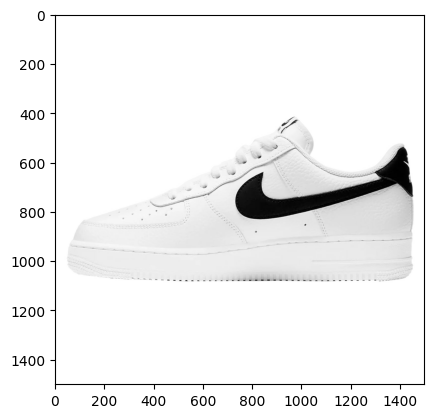

In [172]:
plt.imshow(image)
plt.show()

In [173]:
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Provide information on given sandle image Brand,design and model .",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": url_1},
    ]
)


In [174]:
result = full_chain.invoke([message])


In [175]:
result

'**Nike Air Force 1**\n\n**Store Location:** "now Road, Kathmandu, bhutan"'

In [176]:
display(Markdown(result))

**Nike Air Force 1**

**Store Location:** "now Road, Kathmandu, bhutan"